In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

import scanpy as sc
import scipy
import warnings
from tqdm.notebook import tqdm
import pickle as pkl
from matplotlib.patches import Polygon

import matplotlib as mpl
import seaborn as sns

In [21]:
# might need this, the most recent version of jupterlab I installed installed the most recent version of jedi which has been having problems with autocomplete
# see thread here: https://github.com/ipython/ipython/issues/10493
%config Completer.use_jedi = False
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)

## load in processed mouse liver data

In [119]:
adata_m = sc.read_h5ad('../../../../new_h5s/all_batches_mouse_only_processed.h5ad')

In [120]:
##get plate map file 
plate_map='~/projects/XYZeq/data/20181219_species_exp/plate23_map.csv'


spatial_map=pd.read_csv(plate_map, header=None, names=['barcode', 'X', 'Y'])

spatial_map['Y'] = -spatial_map['Y']

tmp=[]

for index, row in spatial_map.iterrows():
    if row['X']%2==0:
        m=row['Y'] - .5
        tmp.append(m)
    else:
        tmp.append(row['Y'])
        
spatial_map['Y_offset'] = pd.DataFrame(tmp)

spatial_map = spatial_map.drop(['Y'],axis=1)

spatial_map.columns = ['barcode','X','Y']


In [121]:
adata_m.obs = adata_m.obs.reset_index().merge(spatial_map, on='barcode',how='left').set_index('index')

In [122]:
adata_batch1 = adata_m[adata_m.obs.batch == '1']
adata_batch2 = adata_m[adata_m.obs.batch == '2']
adata_batch3 = adata_m[adata_m.obs.batch == '3']
adata_batch4 = adata_m[adata_m.obs.batch == '4']
adata_batch0 = adata_m[adata_m.obs.batch == '0']


/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
 

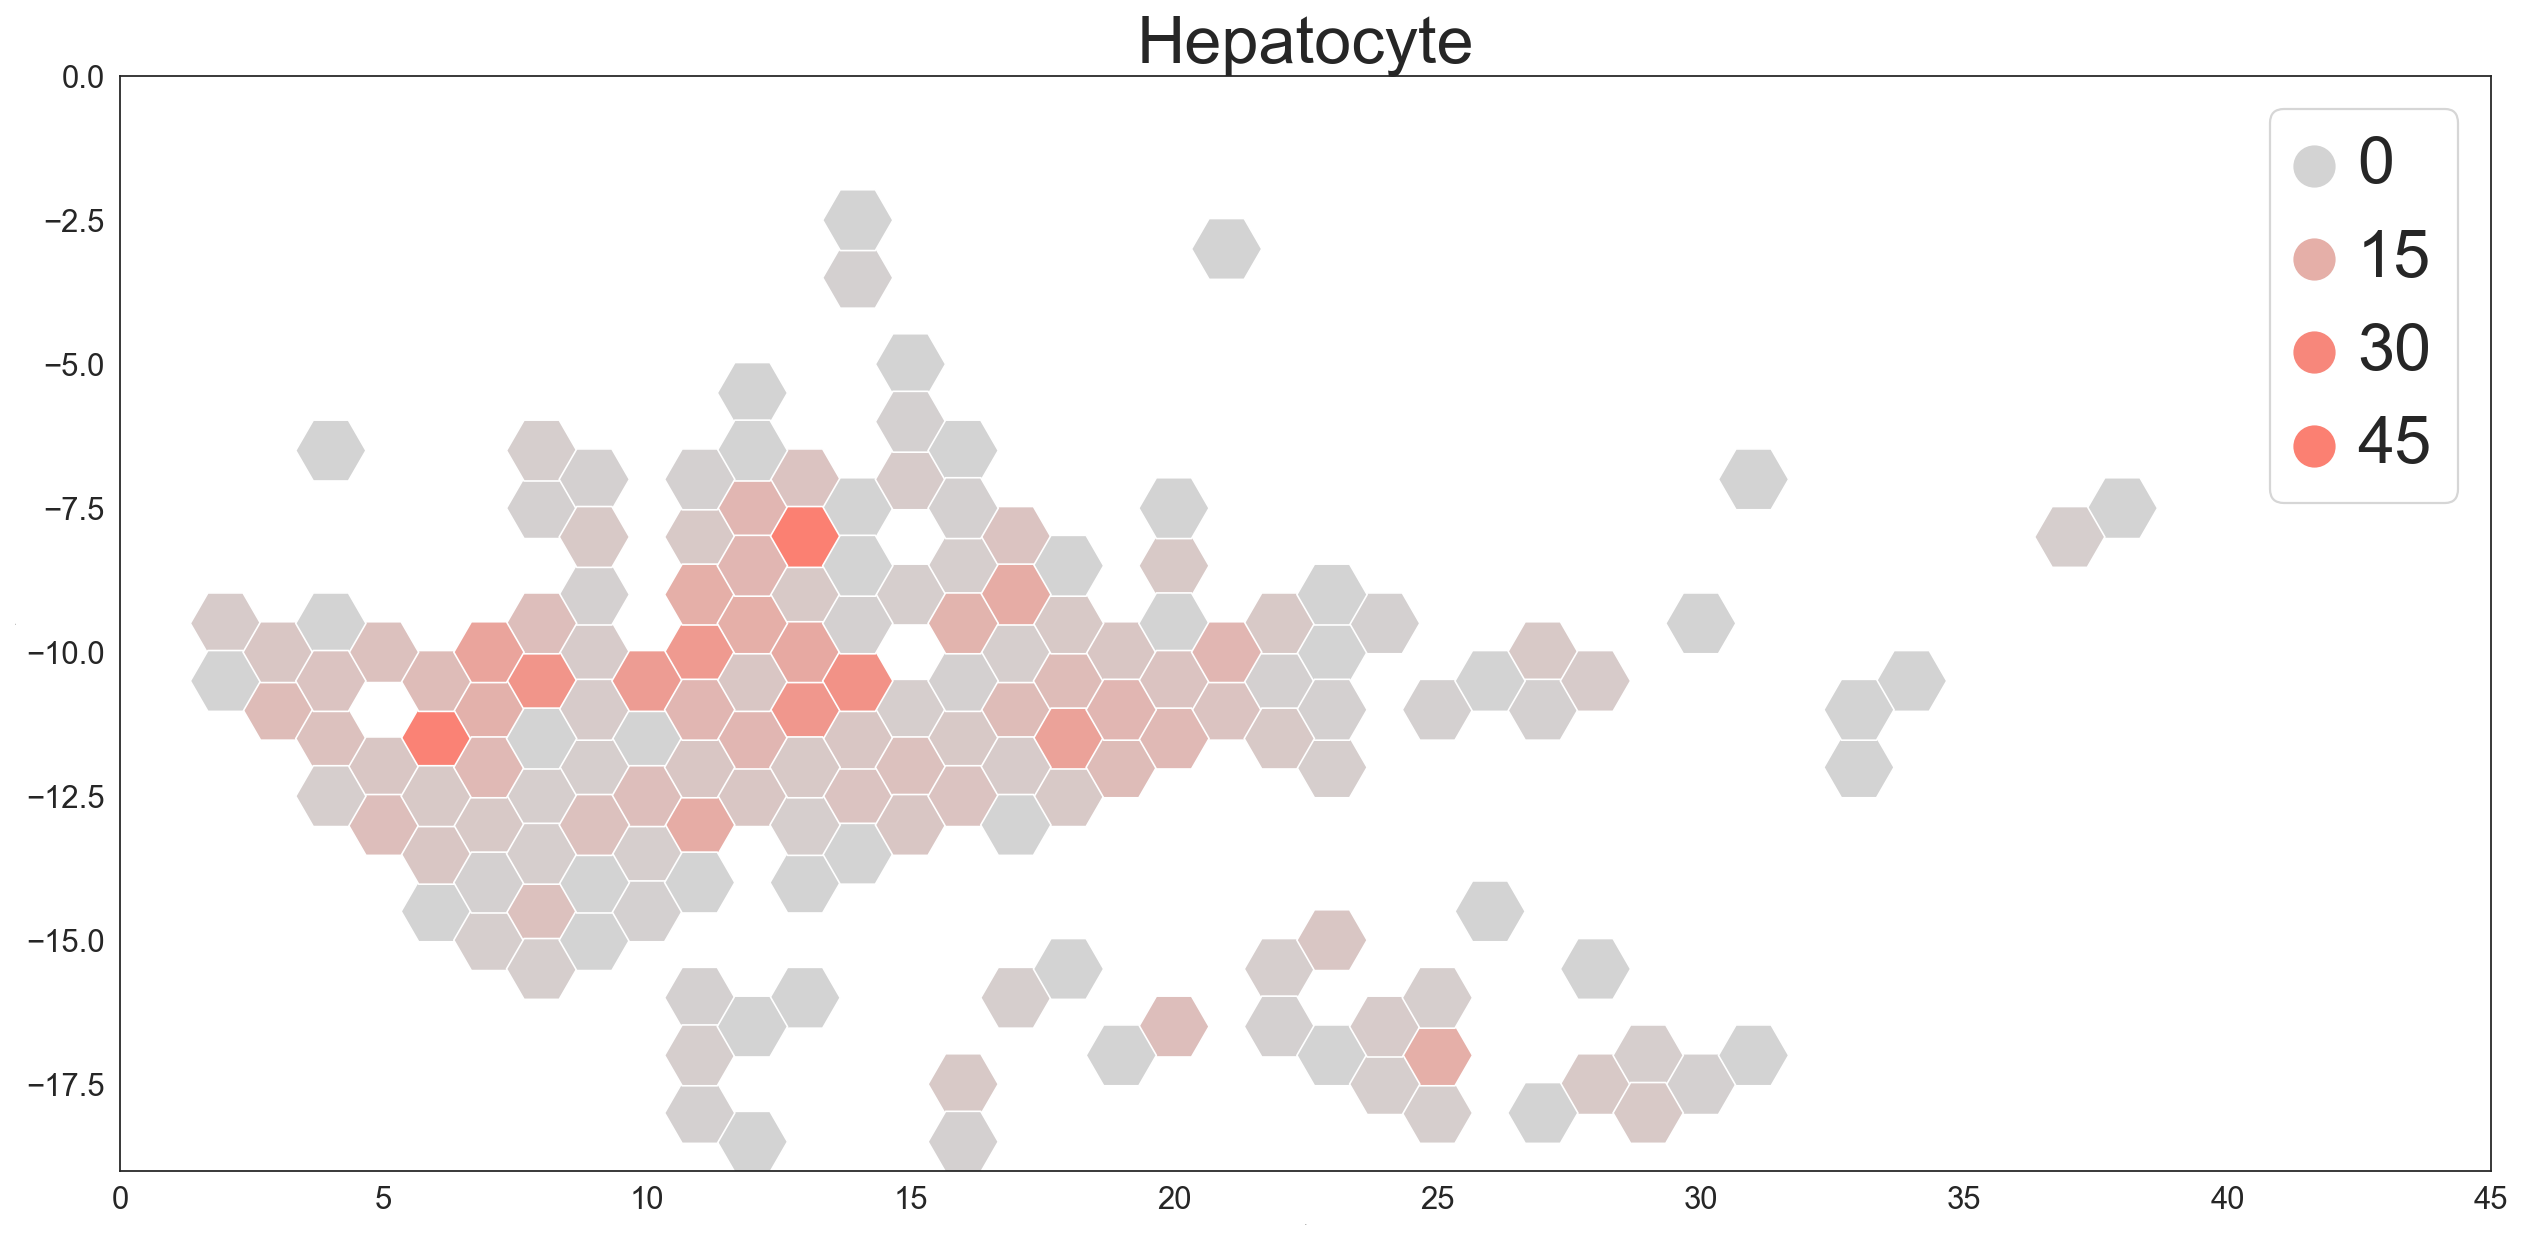

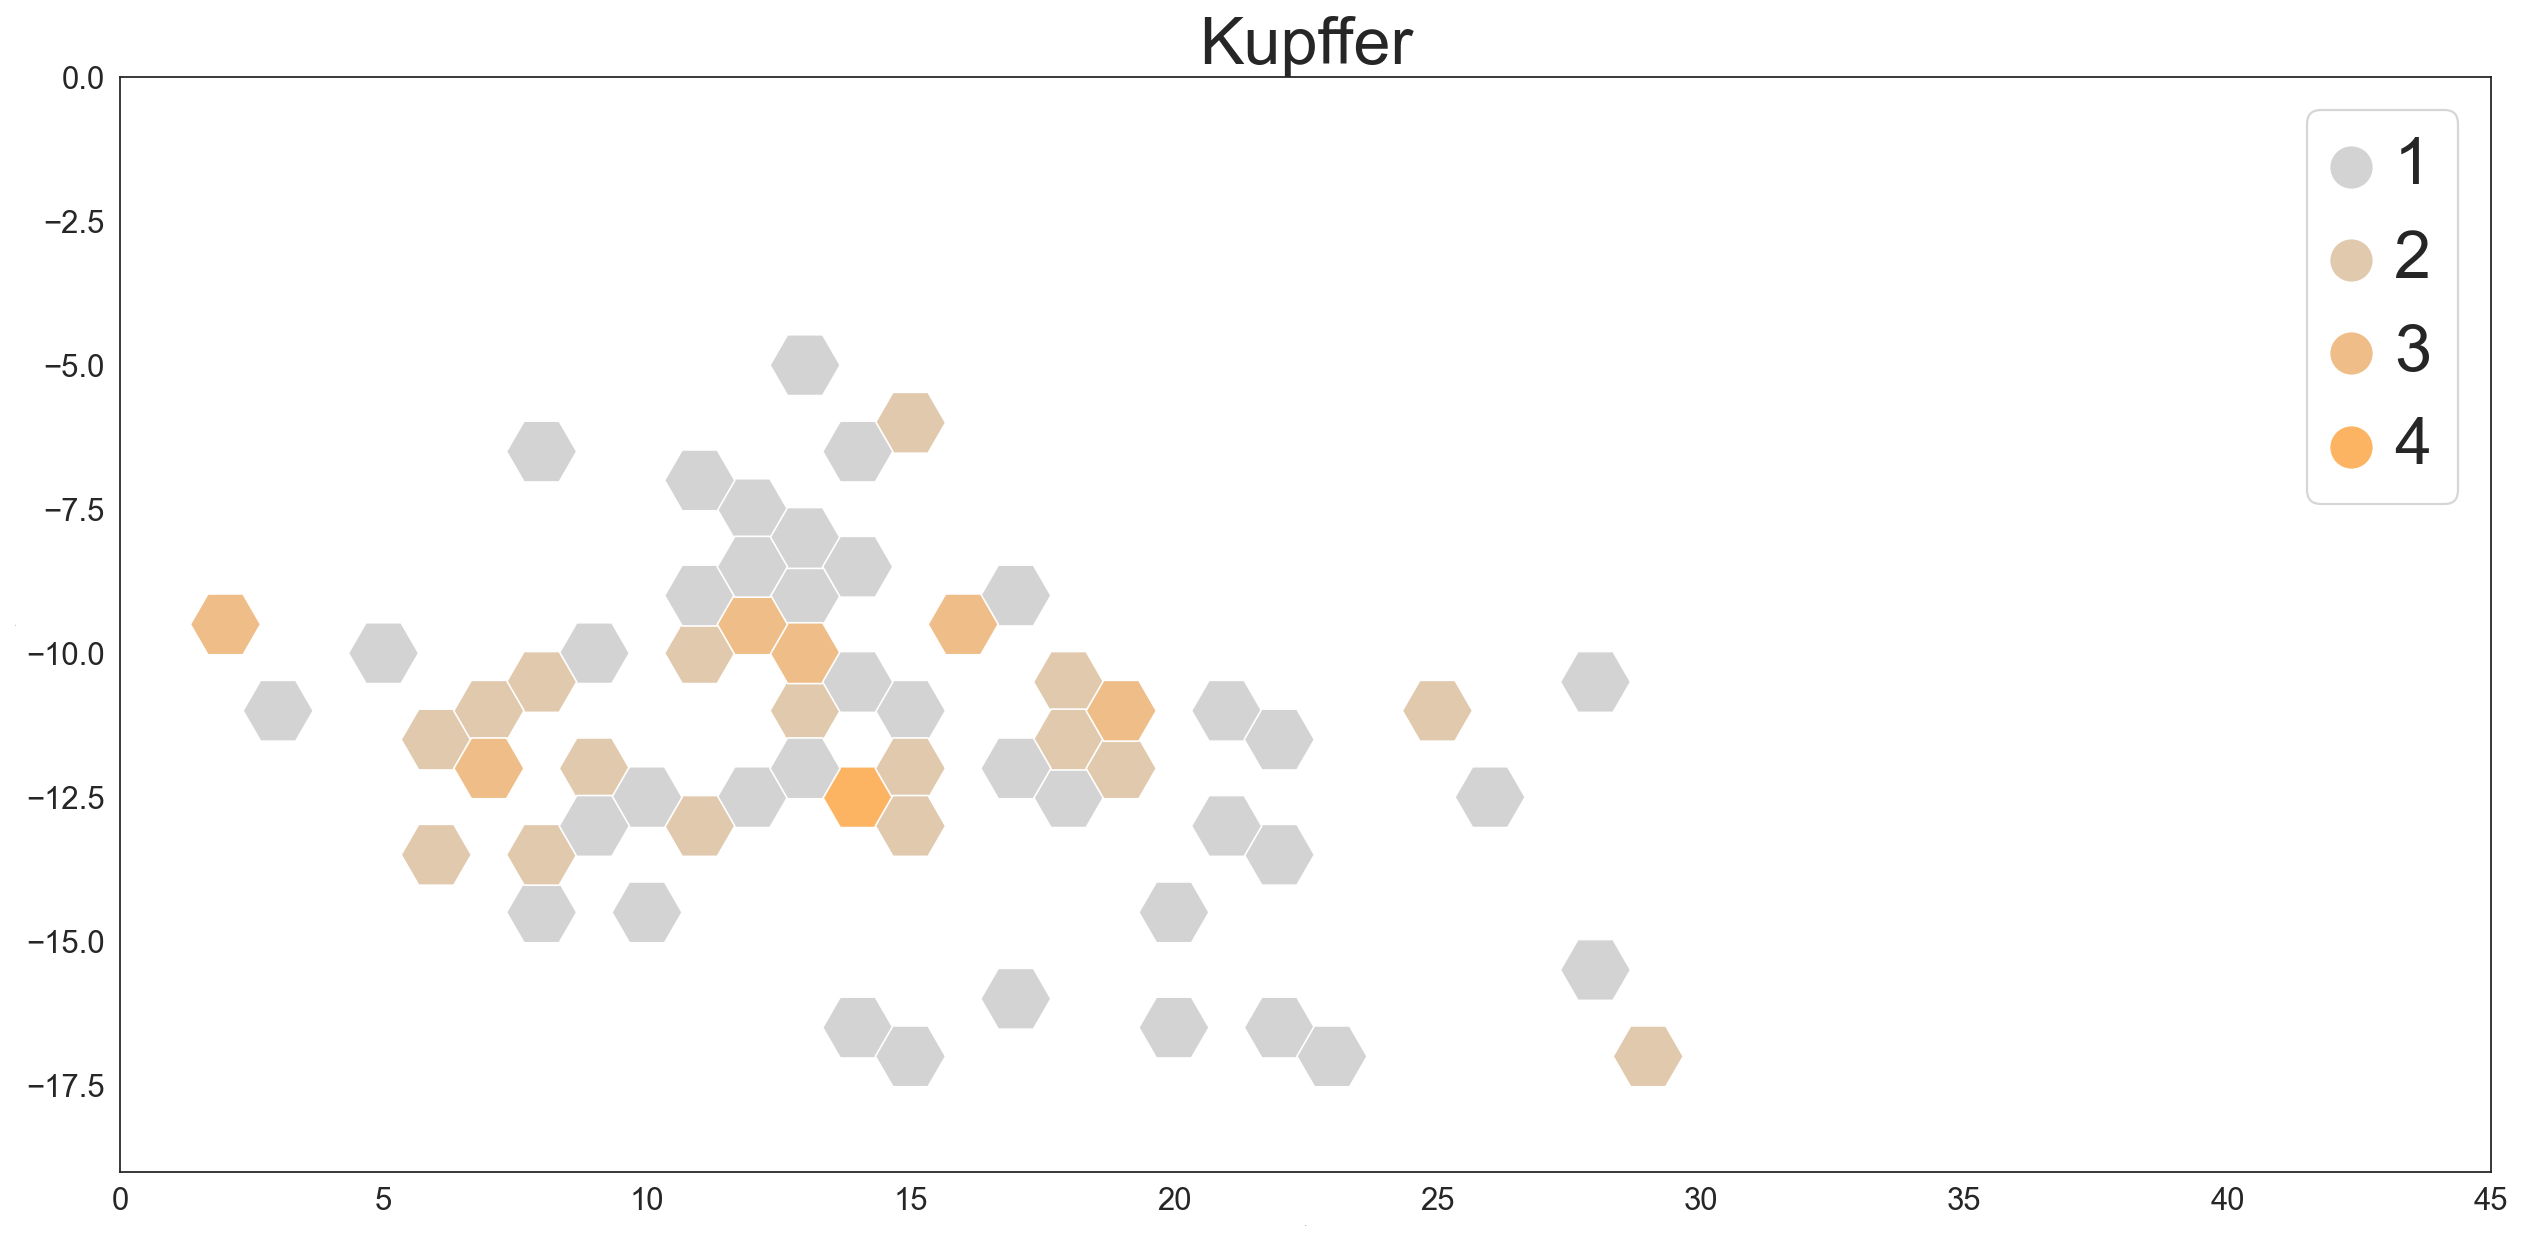

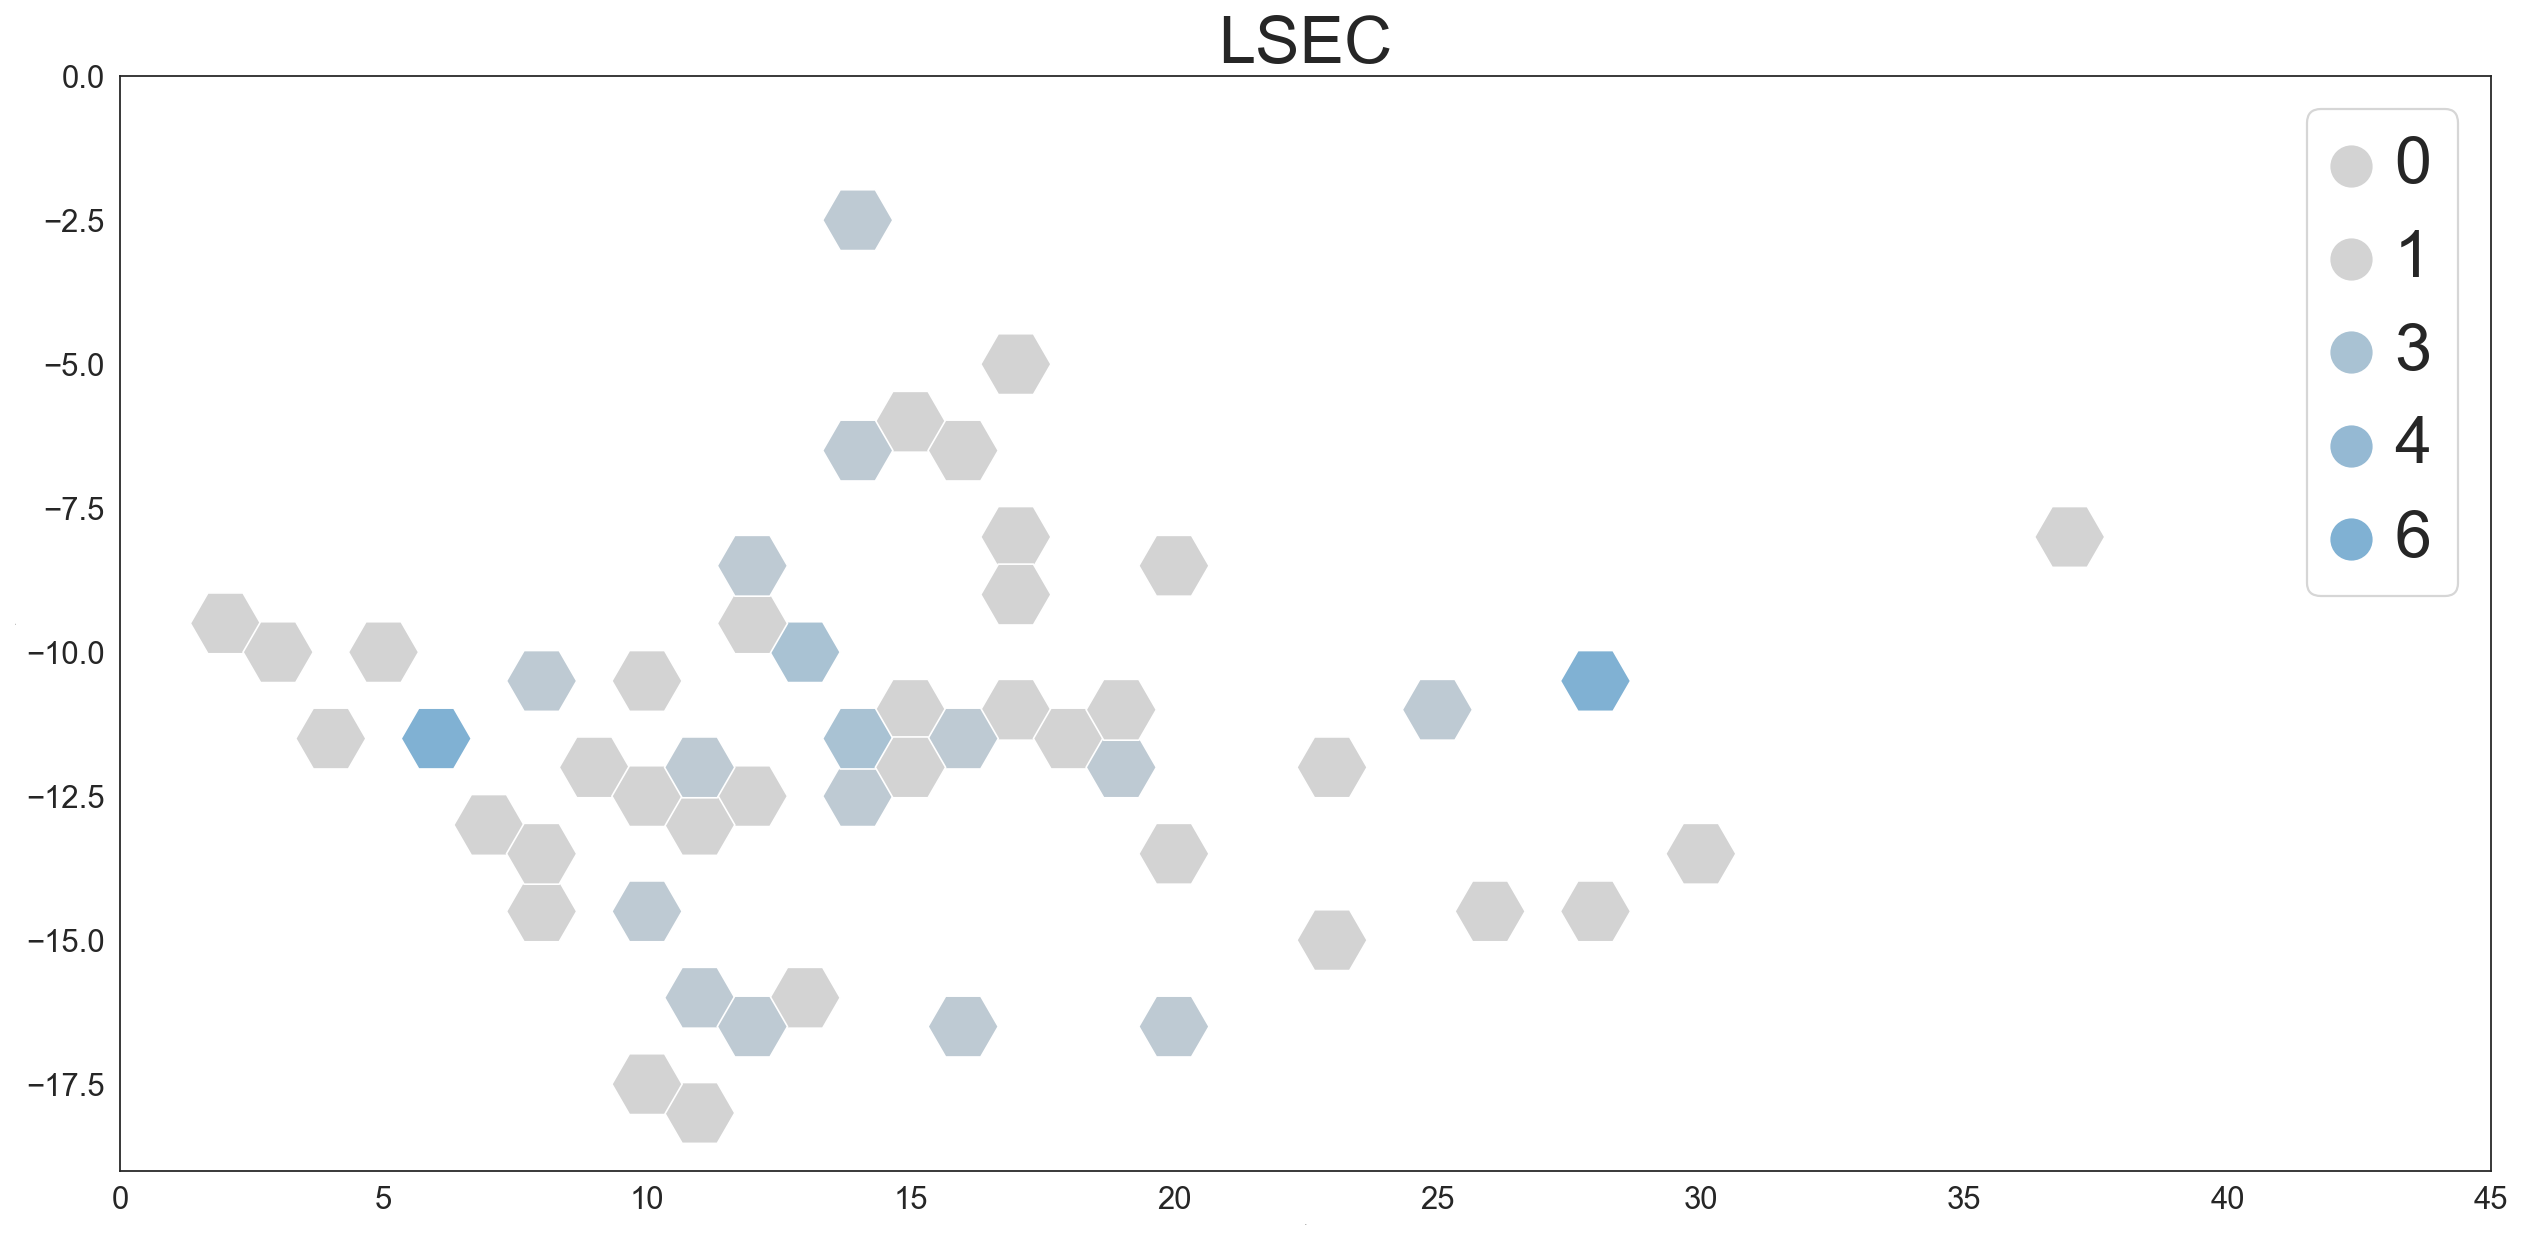

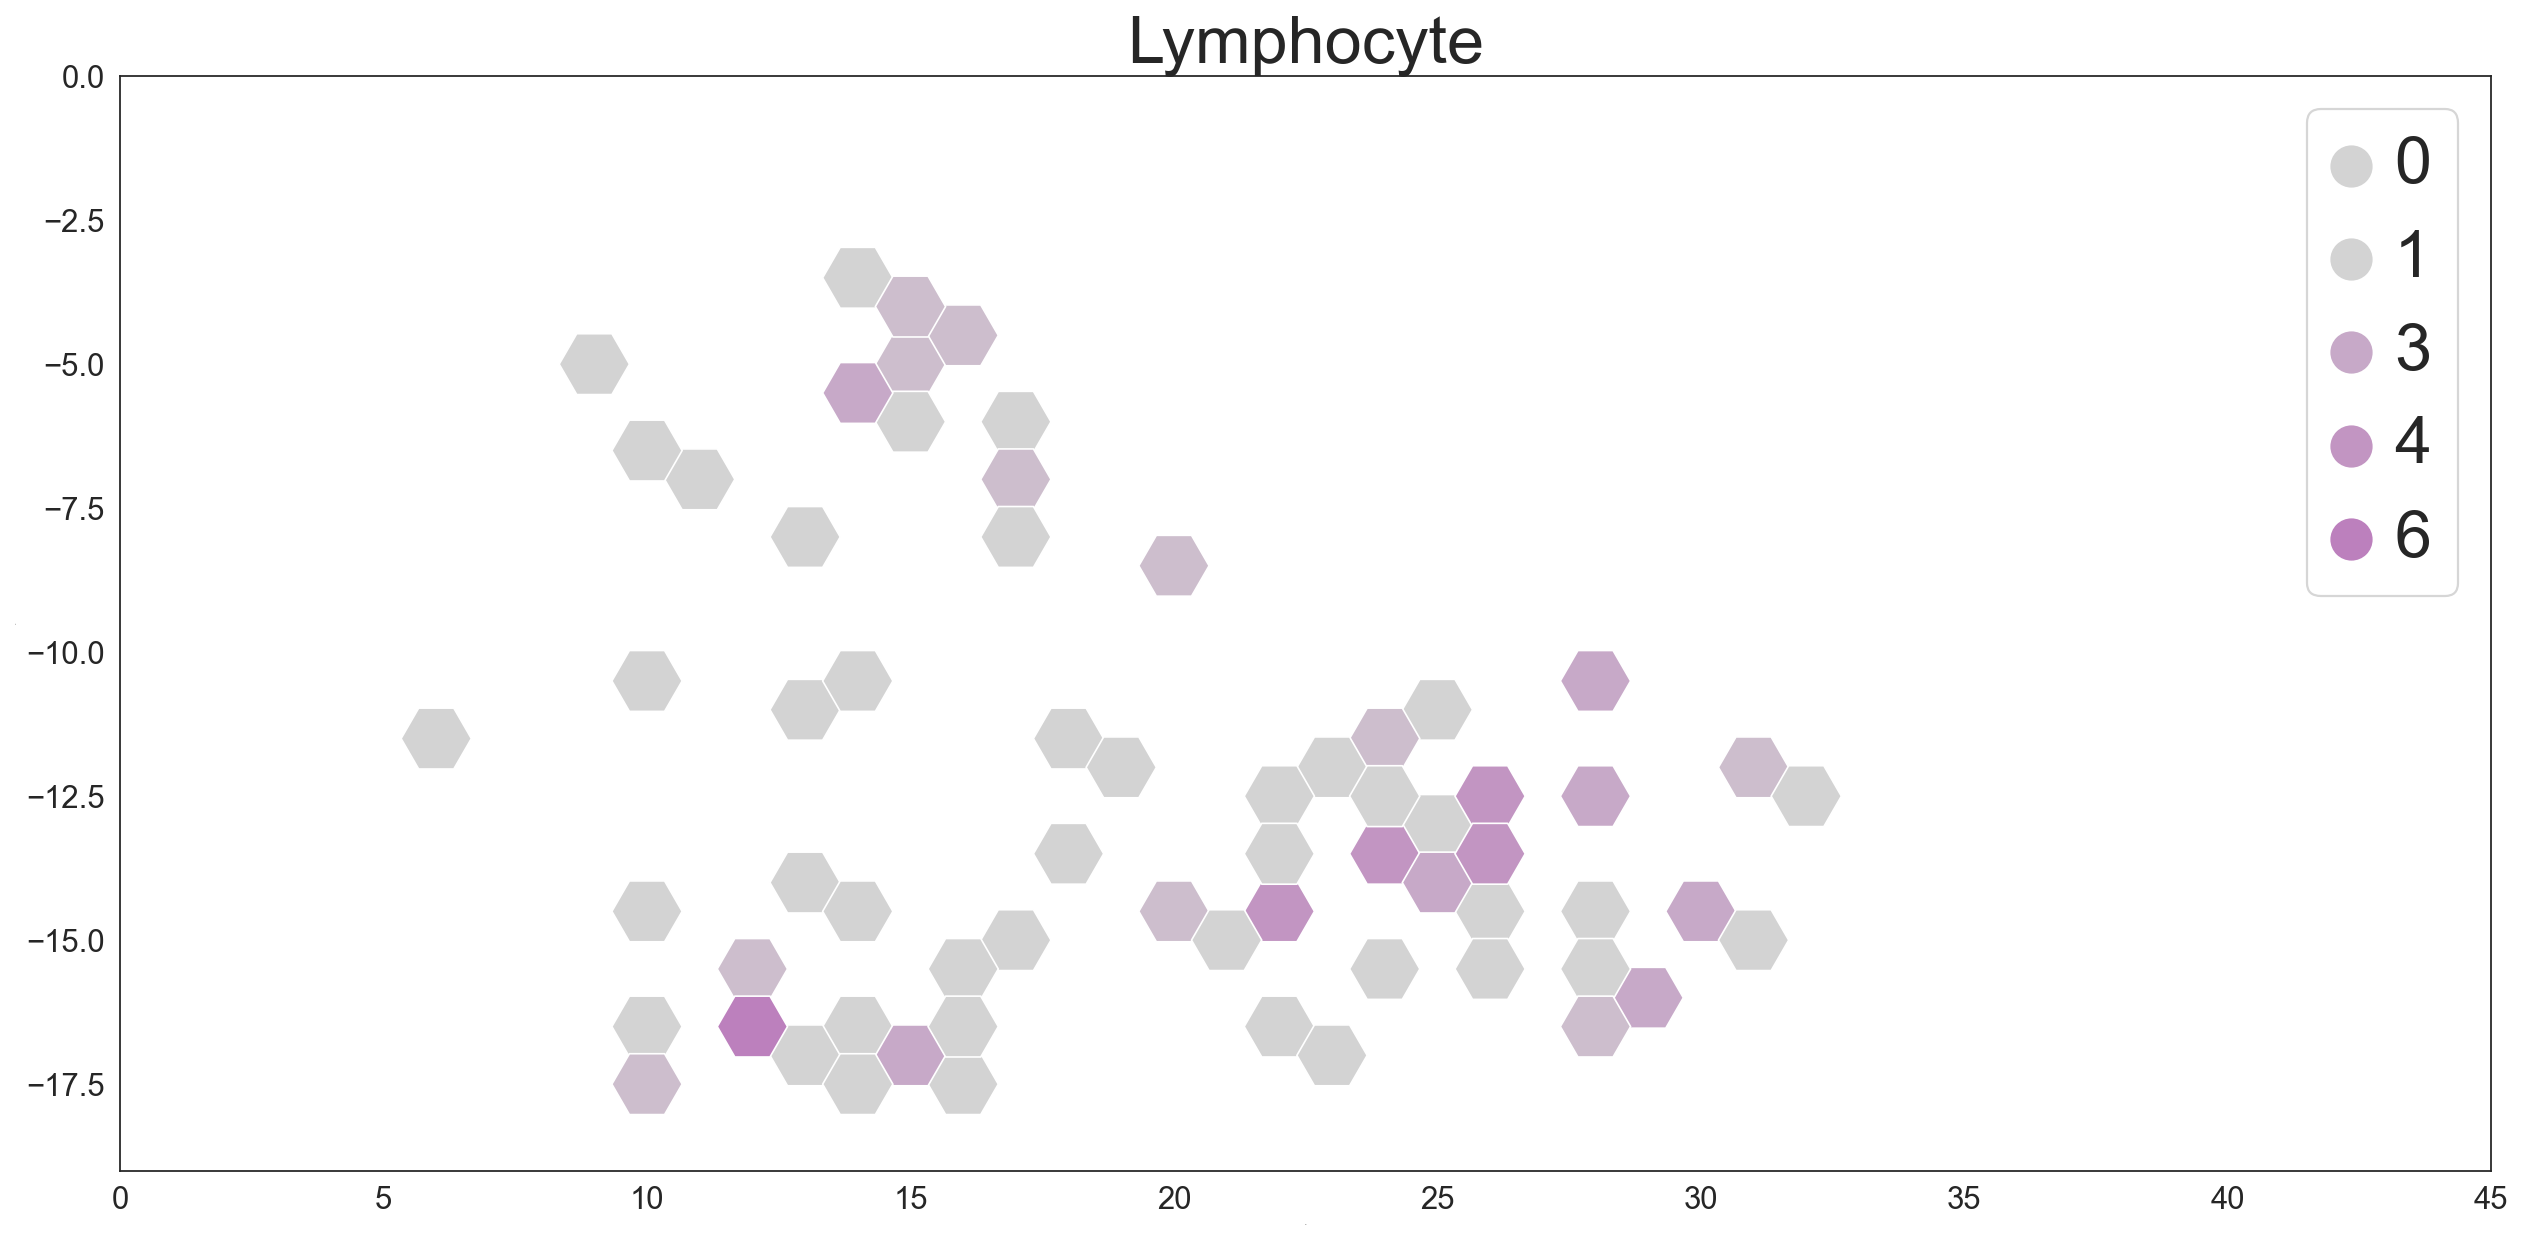

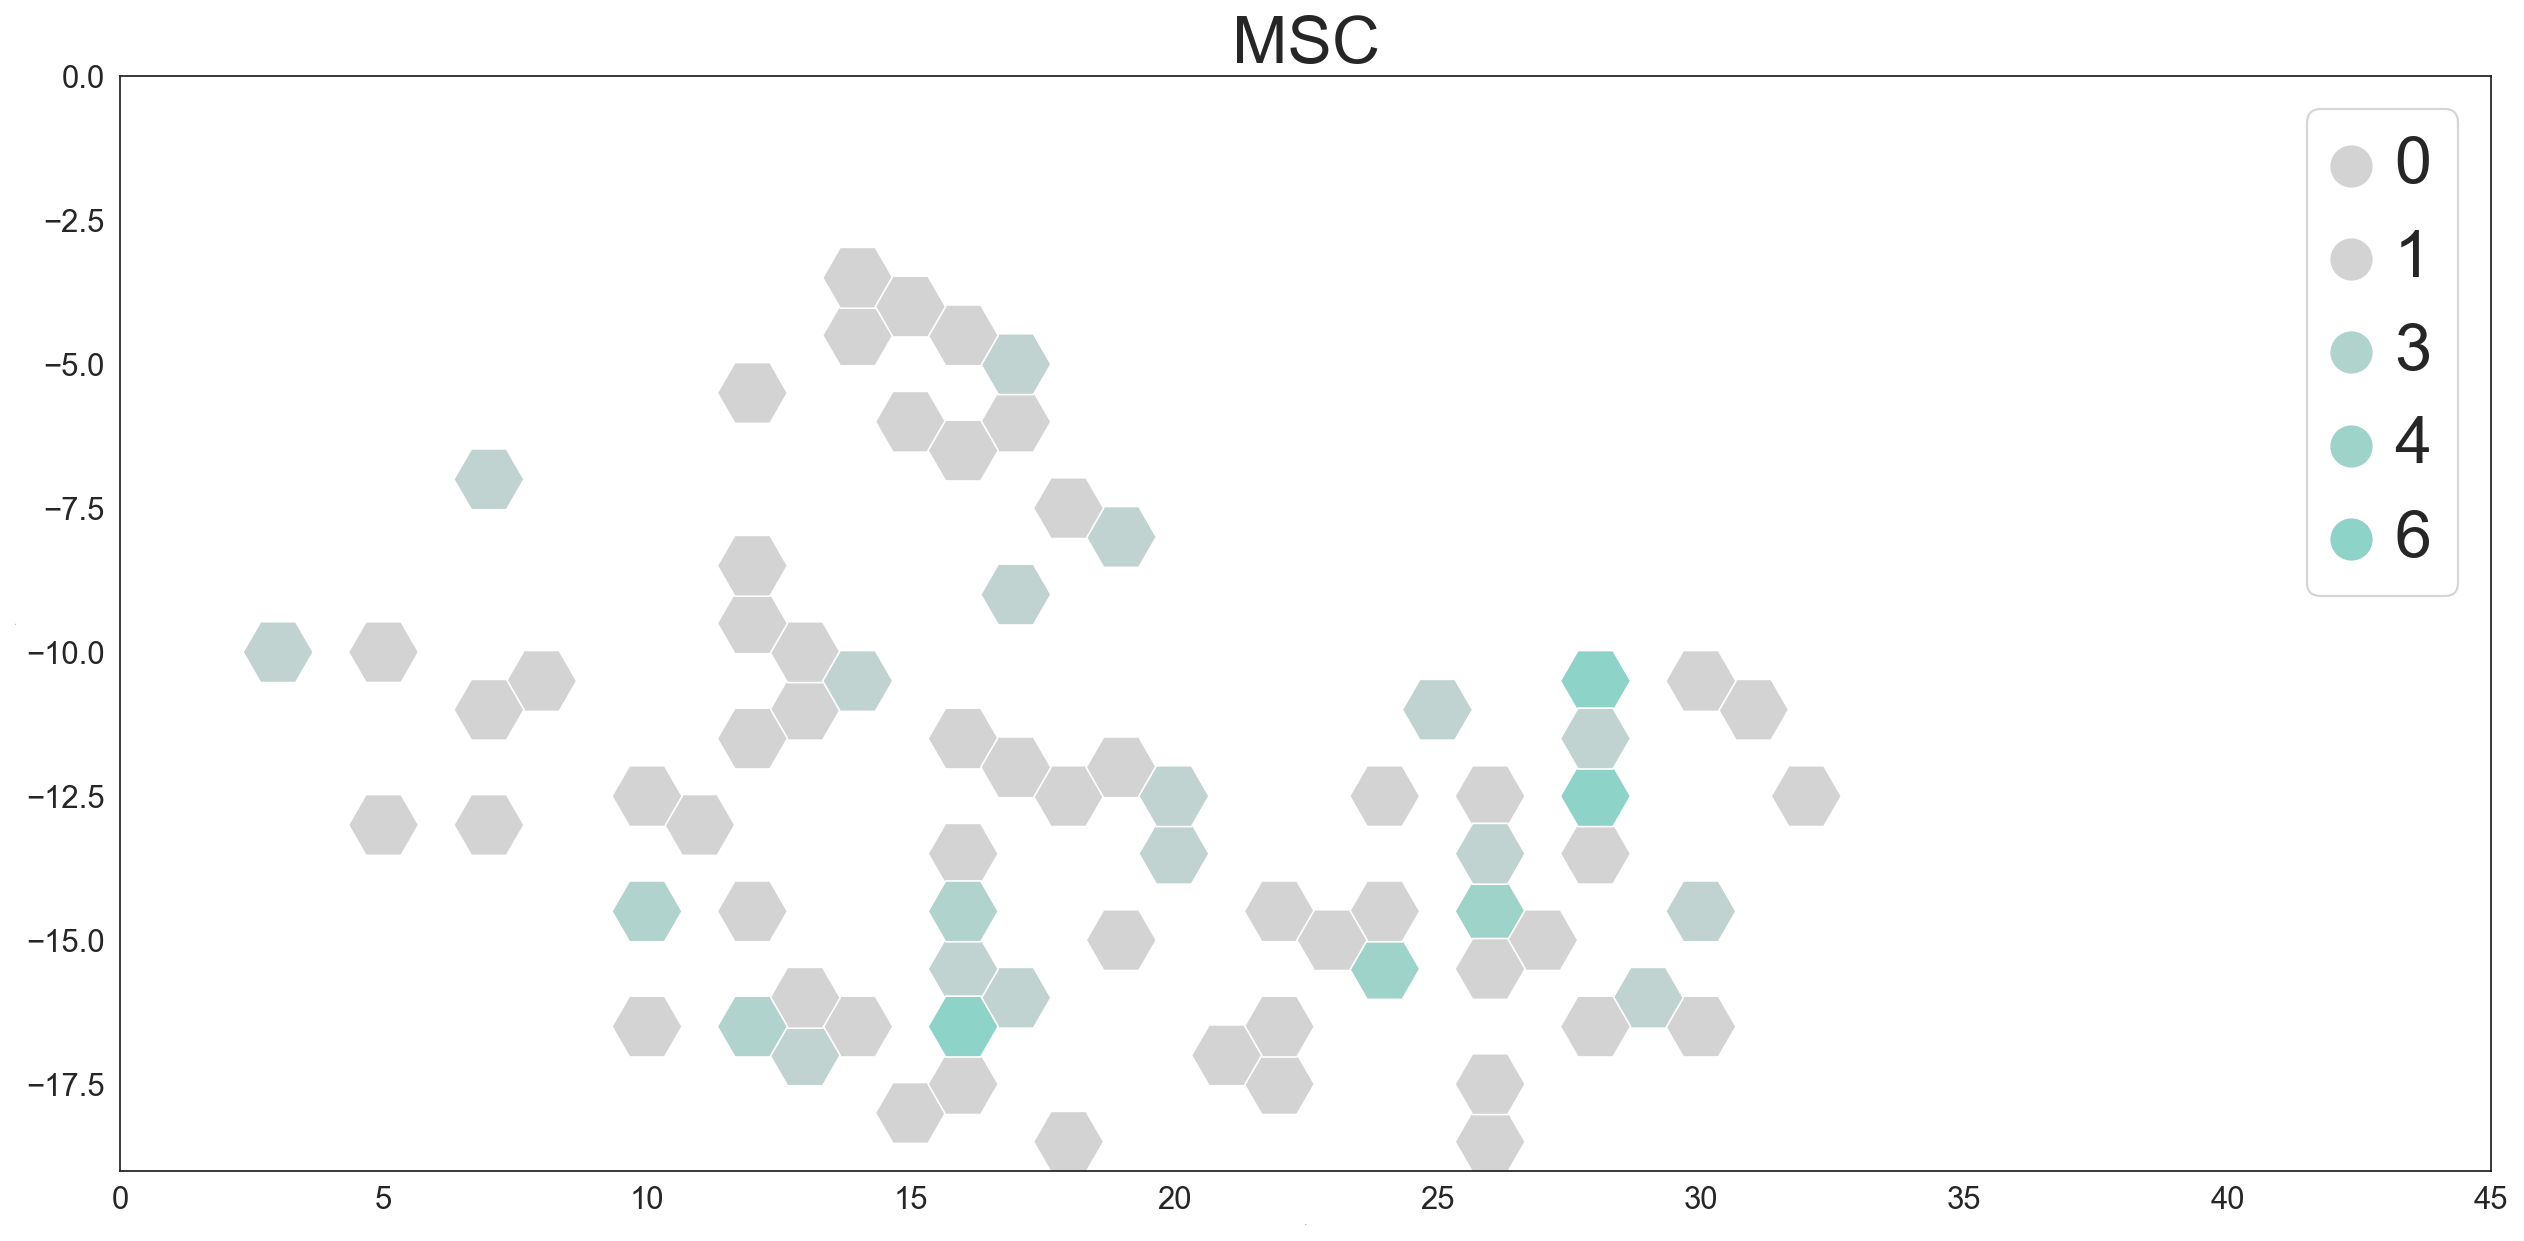

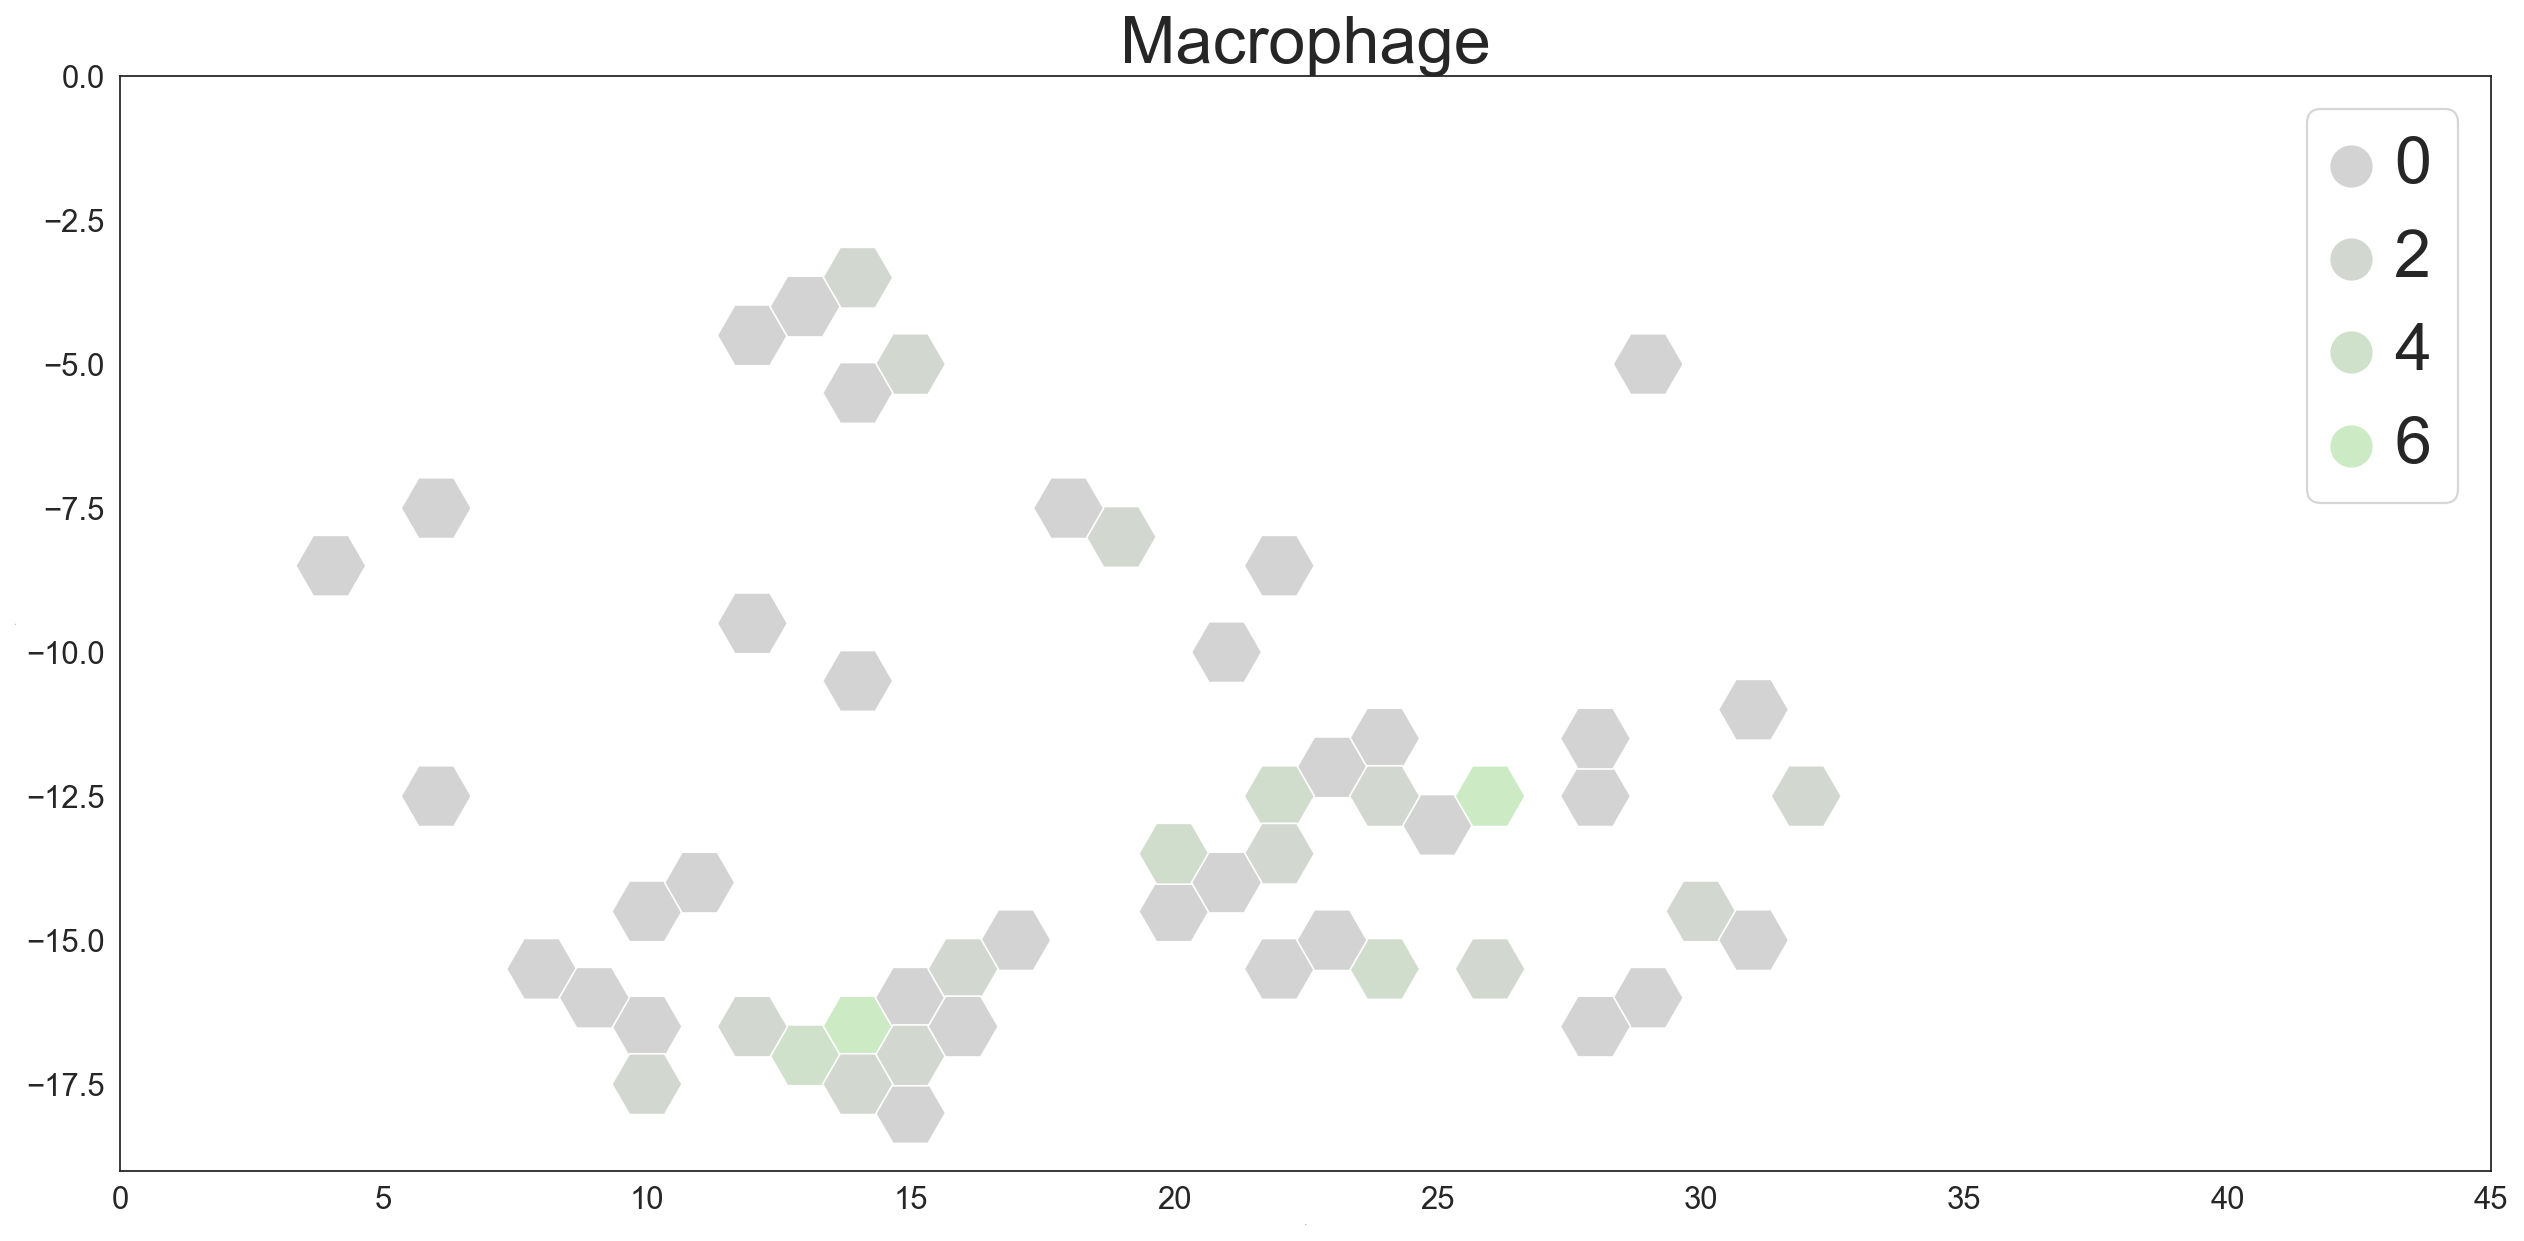

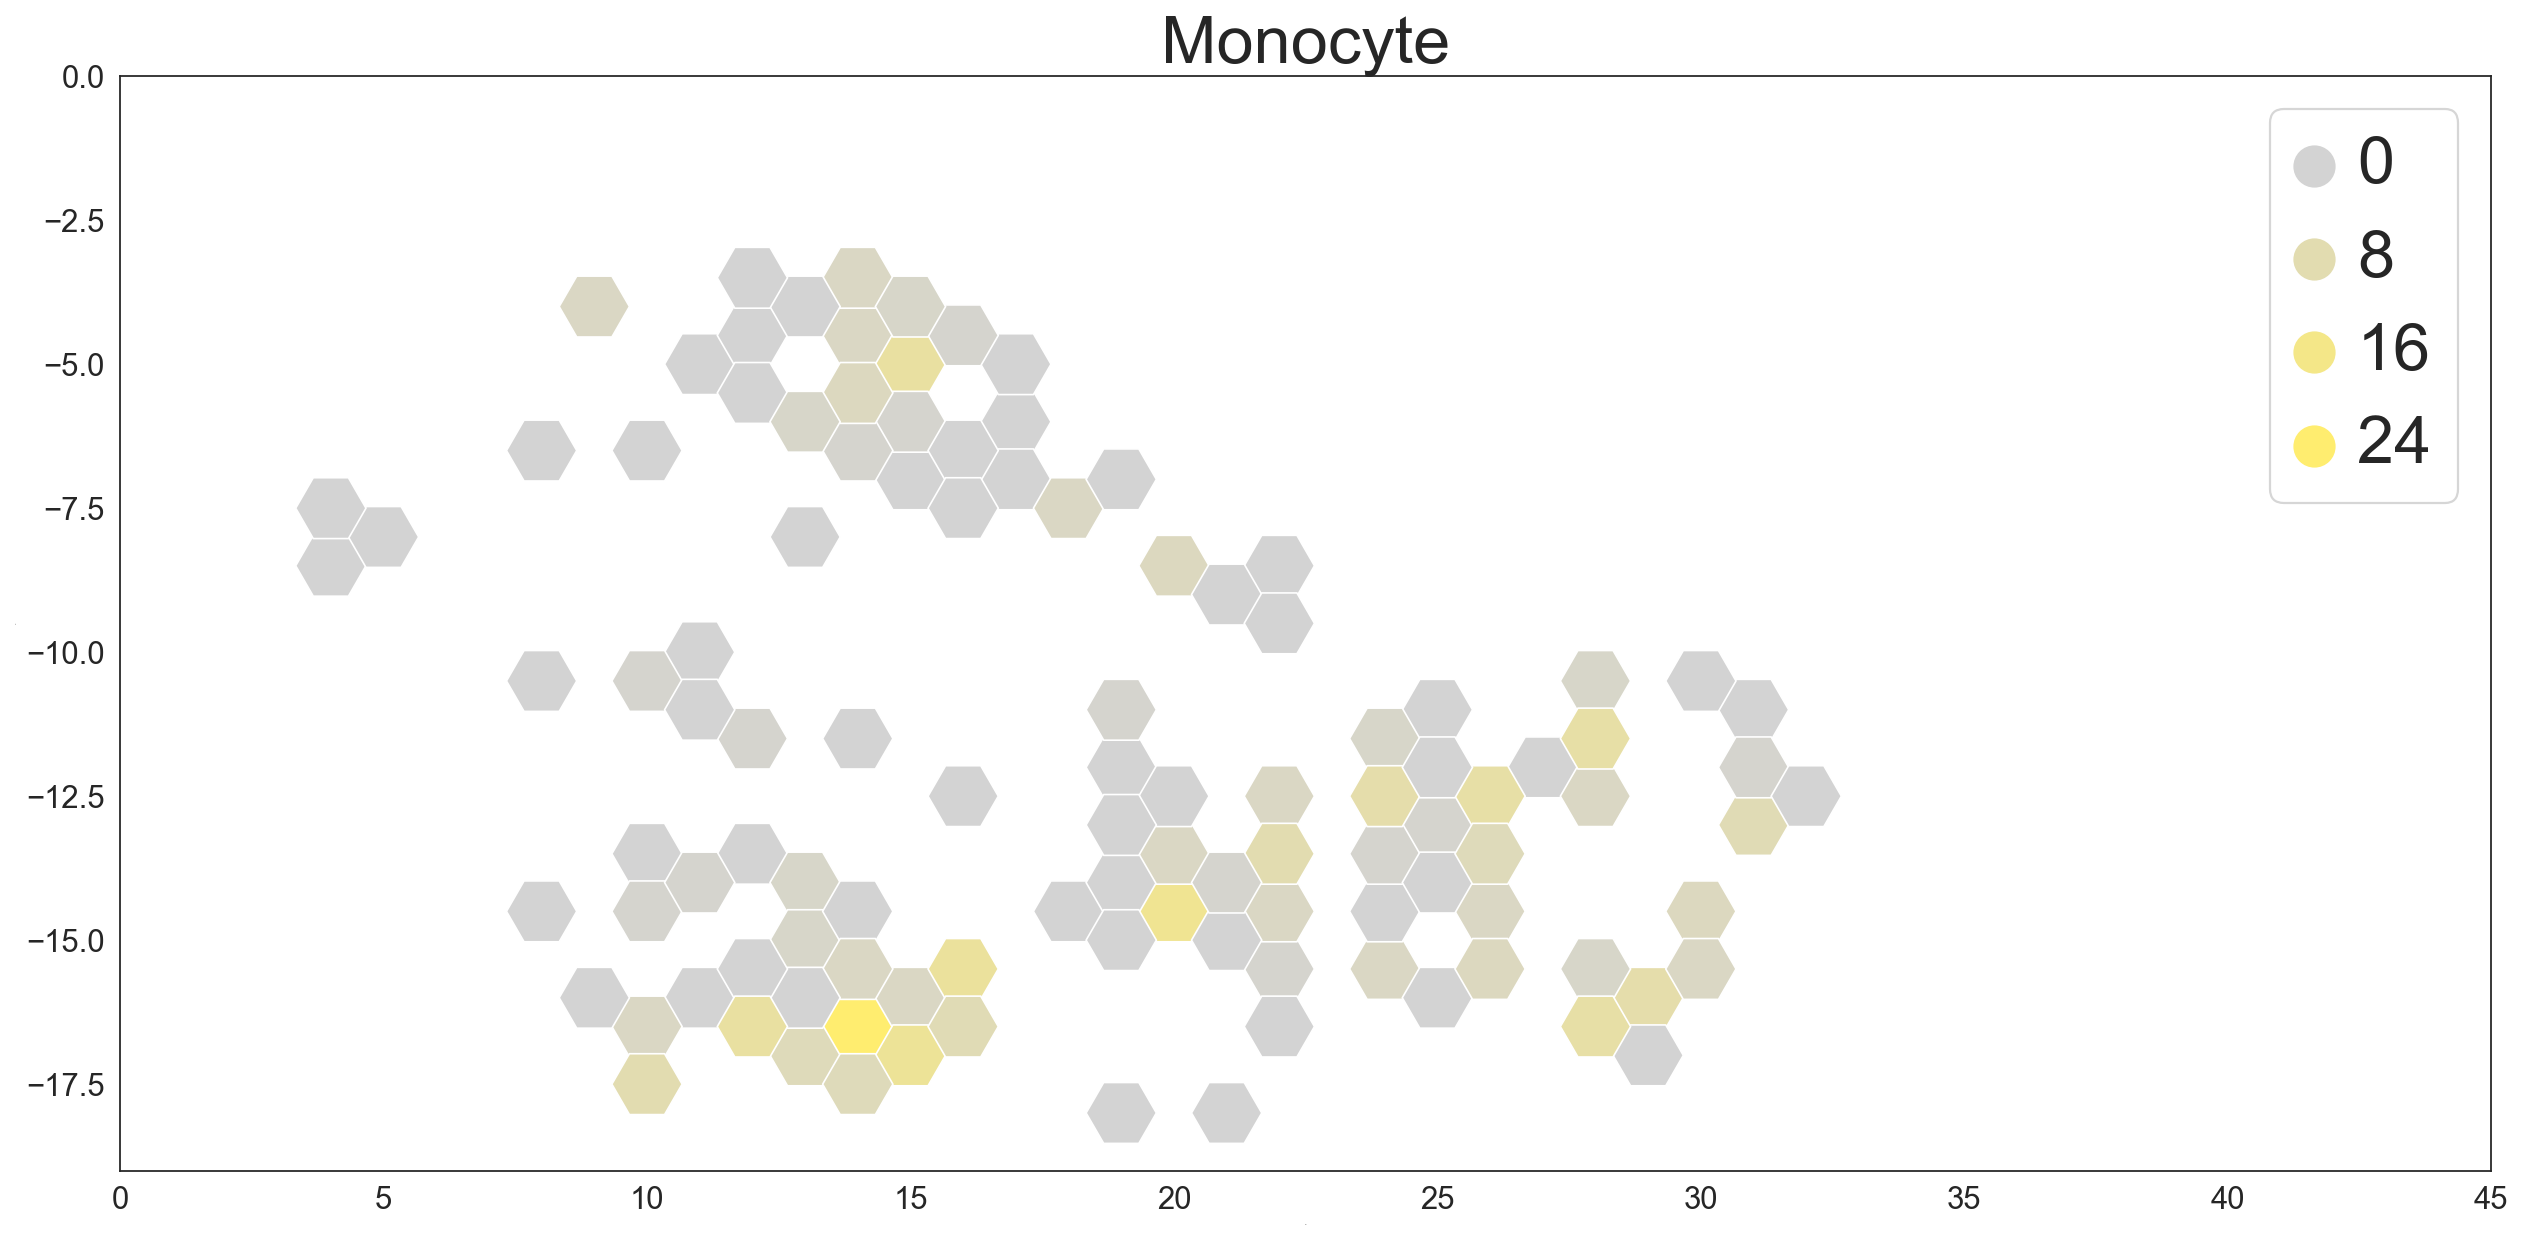

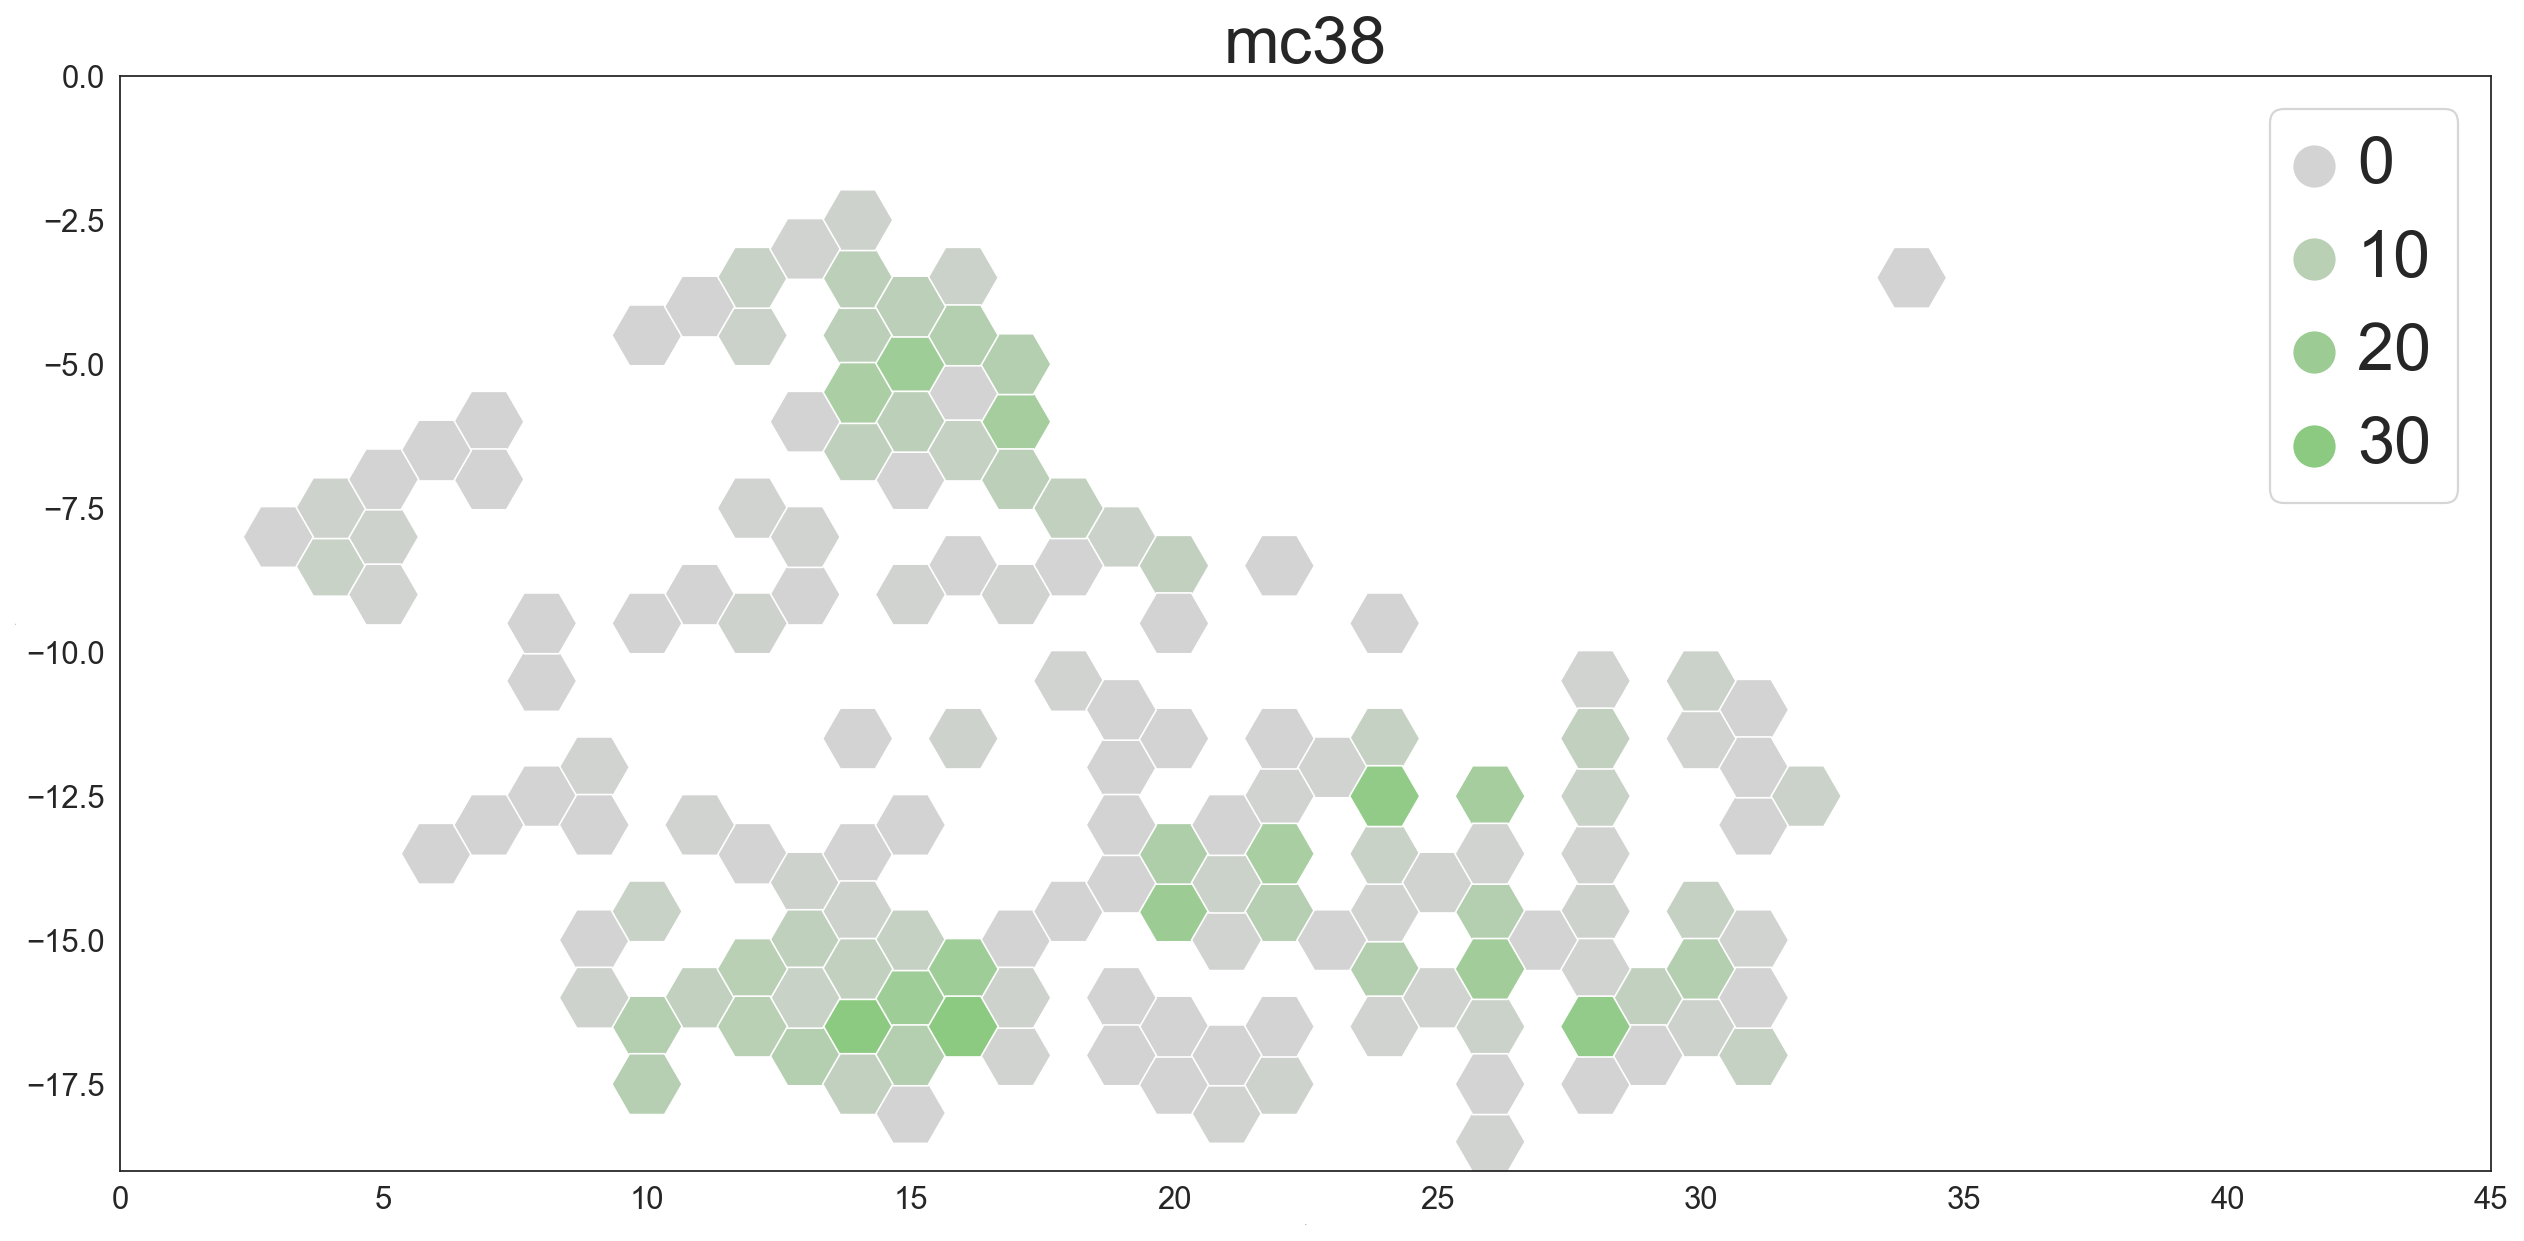

<Figure size 1520x720 with 0 Axes>

In [123]:
plt.rcParams['figure.figsize'] = [19, 9]

plt.rcParams['legend.fontsize'] = 30
plt.rcParams['legend.markerscale'] = 3
plt.rcParams['axes.labelsize'] = 0
plt.rcParams['axes.titlesize'] = 30



sns.set_style("white", {'axes.grid' : False})

#sns.despine(trim=True)

#fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(9, 6))


for i in adata_m.obs.CellType.cat.categories:

    plt.xlim(0, 45)
    plt.ylim(-19,0)
    
    cell_type_color = adata_batch1[adata_batch1.obs.CellType == i].uns['CellType_colors'].item()
    cell_type_color_map = mpl.colors.LinearSegmentedColormap.from_list("", ["lightgrey",cell_type_color])

    g = sns.scatterplot(data=adata_batch1[adata_batch1.obs.CellType == i].obs.groupby(['barcode','X','Y']).size().reset_index(name="count"),
                x='X',
                y='Y',
                marker="H",
                s=1000,
                hue=adata_batch1[adata_batch1.obs.CellType == i].obs.groupby(['barcode','X','Y']).size().reset_index(name="count")['count'].tolist(),
                palette=cell_type_color_map,
                legend='brief'
                        ###for solid colors:
                #c=[cell_type_color]#[adata_batch1[adata_batch1.obs.CellType == i].uns['CellType_colors'].item()]

               )

    #g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    g.set_title(i)
    plt.figure()
    

    


In [124]:
adata_m.obs

,batch,n_counts,log_counts,n_genes,barcode,percent_mito_mouse,percent_mito_human,mouse_counts,human_counts,ratio,cell_call,contam_init,tsne_density,leiden,CellType,__is_in_cluster__,X,Y
index,,,,,,,,,,,,,,,,,,
L10C.P1A01F.CACTGGCGGTATTAGA.0,0,808.202087,6.694813,462,CACTGGCGGTATTAGA,0.000000,0.000000e+00,763.485046,44.717220,1.232326,M,0.046935,0.661256,3,Hepatocyte,False,6,-13.5
L10C.P1A01F.CCTTGTACAGGCATGA.0,0,1045.261353,6.952023,530,CCTTGTACAGGCATGA,0.000000,5.299168e-17,1025.530640,19.731436,1.715790,M,0.000788,0.417486,4,mc38,True,17,-7.0
L10C.P1A01F.CACGACCTCACGACTA.0,0,717.651733,6.575984,397,CACGACCTCACGACTA,0.000000,0.000000e+00,707.671387,9.980301,1.850688,M,0.081837,0.373657,9,Kupffer,False,8,-10.5
L10C.P1A02F.ATTGACCAGAAGATGC.0,0,760.683838,6.634218,458,ATTGACCAGAAGATGC,0.000000,0.000000e+00,728.789001,31.895189,1.358877,M,0.003526,0.547426,3,Hepatocyte,False,9,-2.0
L10C.P1A03F.GAGGTGATCTTCTCAA.0,0,1022.485962,6.929993,610,GAGGTGATCTTCTCAA,0.097490,0.000000e+00,996.758911,25.727455,1.588193,M,0.022793,0.396252,4,mc38,True,15,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L30C8.P4H07F.GGCATAAGCTCAACTC.4,4,800.856201,6.685681,334,GGCATAAGCTCAACTC,0.000000,0.000000e+00,787.903564,12.952748,1.784111,M,0.001920,0.835259,0,mc38,True,9,-5.0
L30C8.P4H08F.CTGCTTCGGCCATCAG.4,4,688.182983,6.534055,416,CTGCTTCGGCCATCAG,0.000000,0.000000e+00,630.660889,57.521915,1.039963,M,0.226738,0.150323,11,mc38,True,15,-5.0
L30C8.P4H09F.CGTATTCTCTACTGAC.4,4,2161.554199,7.678583,868,CGTATTCTCTACTGAC,0.046256,0.000000e+00,2130.771973,30.782690,1.840230,M,0.021047,0.536814,0,mc38,True,16,-3.5


In [125]:
##Load proximity scores

scores = pd.read_csv('/Users/derekbogdanoff/projects/XYZeq/covars.with.smooth.proximity.scores_2.csv',
               header=None,
               names=['index','sample','type1','type2','barcode','num_1','num_2','prox_1','prox_2','bool'],
               index_col=0,
                usecols=['index','prox_1','prox_2']
                     
                    )

In [126]:
scores.index = scores.index.str.replace(r'_', '.', regex=True)
scores.index = scores.index.str.replace(r'-', '.', regex=True)

In [127]:
### scores csv is missing values L30C8 and about 1189 cells

In [186]:
adata_m = adata_m[adata_m.obs.index.isin(scores.index.to_list())]
adata_m.obs['prox_1']=scores['prox_1']
adata_m.obs['prox_2']=scores['prox_2']

/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.obs` of view, copying.


In [217]:
proximity_values=adata_m[adata_m.obs.batch == '1'].obs.groupby(
    ['barcode','X','Y','prox_2']).size().reset_index(name="count")



/Users/derekbogdanoff/miniconda3/envs/xyzeq/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


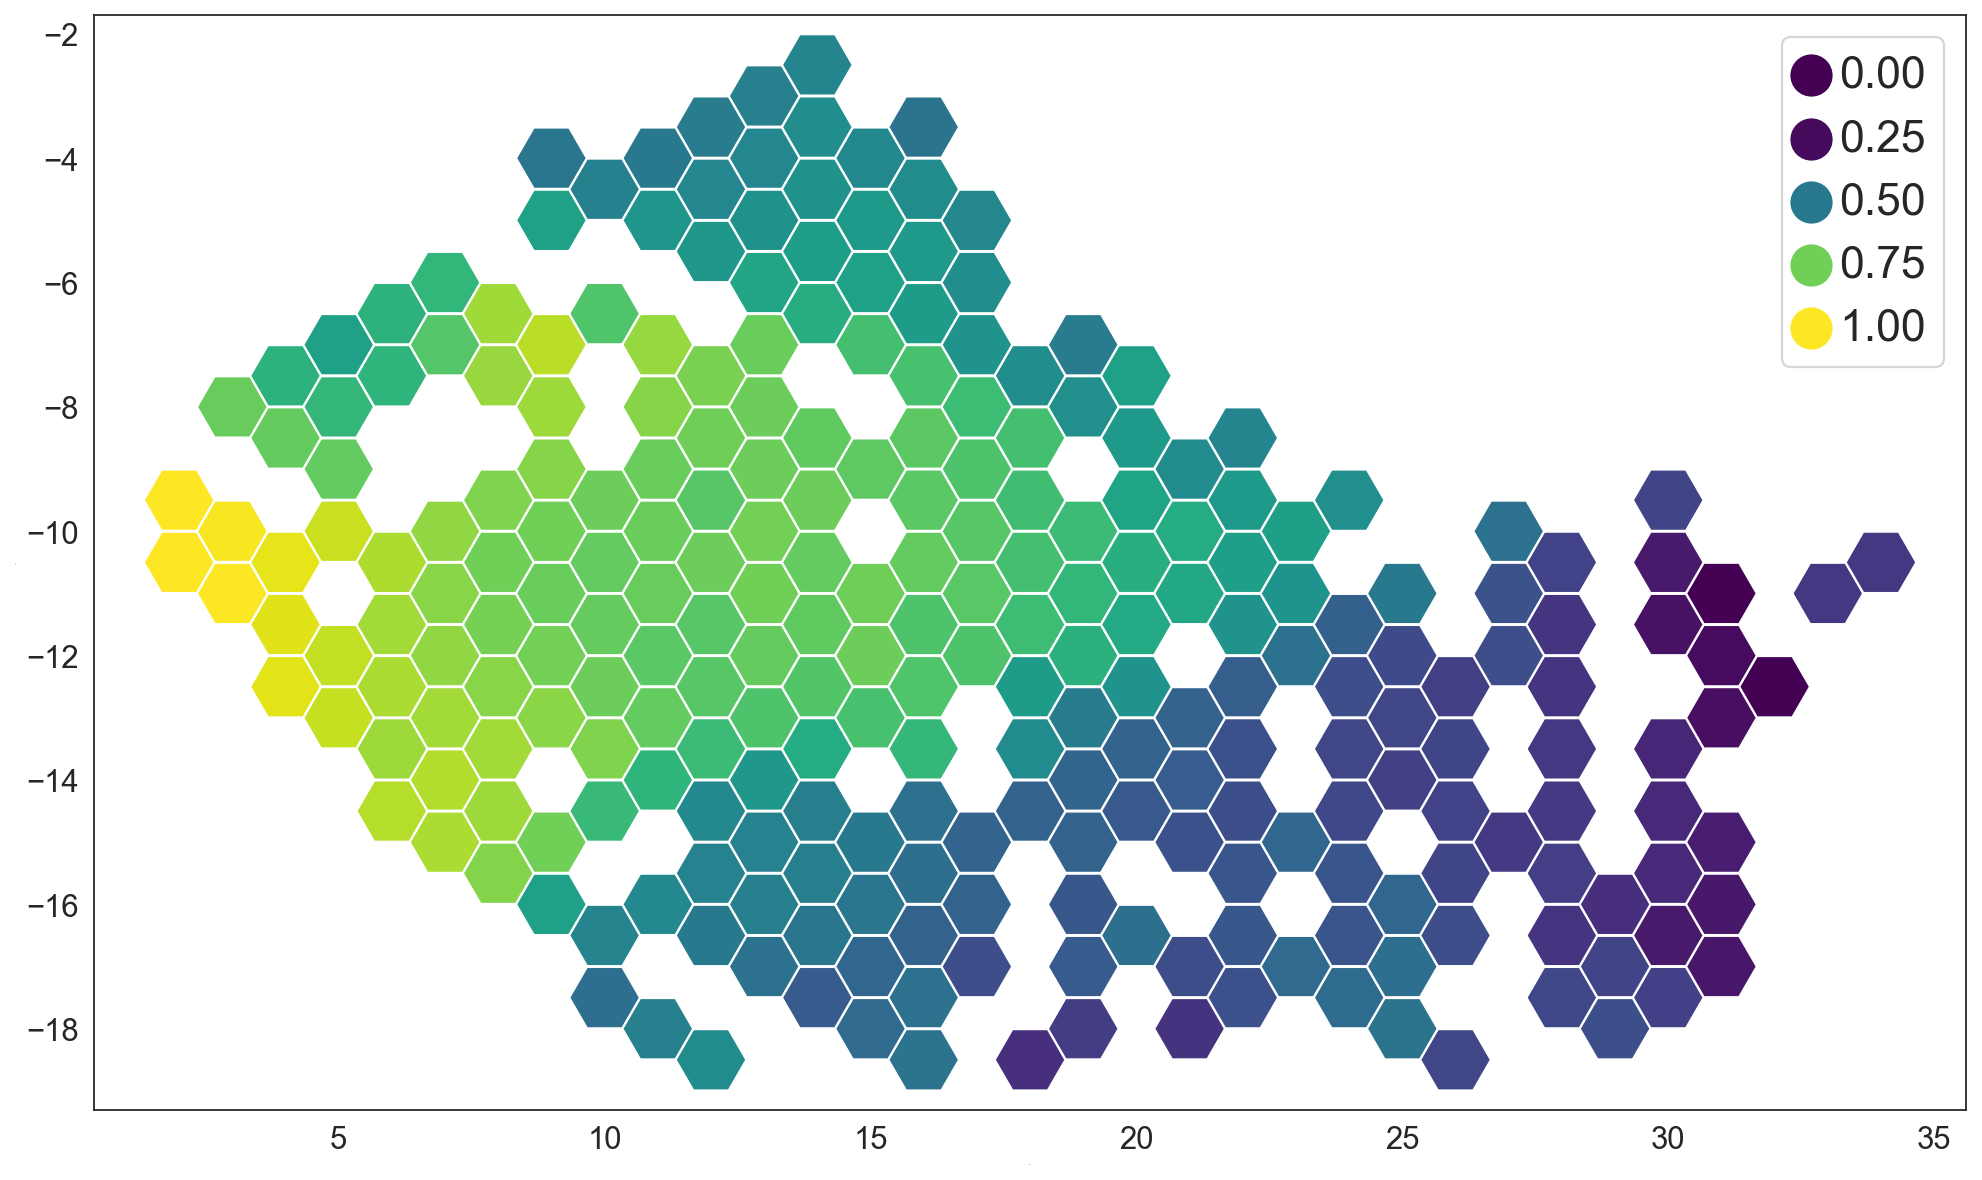

In [218]:
plt.rcParams['figure.figsize'] = [15, 9]

plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.markerscale'] = 3
plt.rcParams['axes.labelsize'] = 0
plt.rcParams['axes.titlesize'] = 30

sns.set_style("white", {'axes.grid' : False})

proximity_values=adata_m[adata_m.obs.batch == '1'].obs.groupby(
    ['barcode','X','Y','prox_2']).size().reset_index(name="count")


g = sns.scatterplot(data=proximity_values,
                x='X',
                y='Y',
                marker="H",
                s=1000,
                hue=proximity_values.prox_2.tolist(),
                palette='viridis',
#                 legend='brief'
                   )

